In [34]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import mean_squared_error

In [2]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Information Loss informs us how much variance is not being captured by the principal components I have selected.

Reconstruction Accuracy represents how accurately the original data can be approximated from the reduced-dimensional data.

# Milk Froth

In [39]:
csv_files = [
    'data/ablation_topic_froth.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)

In [40]:
all_embeddings = []

for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

all_embeddings_array = np.array(all_embeddings)

In [41]:
# Perform PCA to reduce the embeddings to 2 dimensions for visualization
pca = PCA(n_components=2)
all_embeddings_array = StandardScaler().fit_transform(all_embeddings_array)
reduced_embeddings = pca.fit_transform(all_embeddings_array)

# Compute information loss
information_loss = 1 - np.sum(pca.explained_variance_ratio_)
print(f"Information Loss: {information_loss * 100:.2f}%")

# Steps to calculate reconstruction error

# Project the reduced data back to the original space
reconstructed_embeddings = pca.inverse_transform(reduced_embeddings)

# Calculate reconstruction error
reconstruction_error = mean_squared_error(all_embeddings_array, reconstructed_embeddings)

print(f"Reconstruction Error: {reconstruction_error}")

Information Loss: 88.02%
Reconstruction Error: 0.8802112936973572


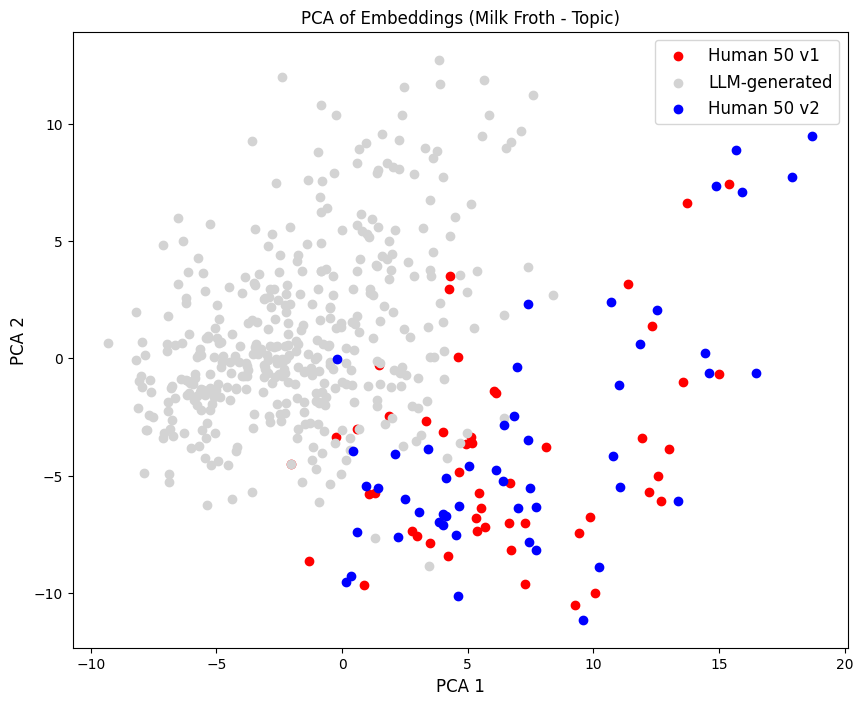

In [42]:
# Create a list of labels for each embedding
labels = []
for column in column_embeddings.keys():
    # Extend the labels list with the column name repeated as many times as there are embeddings for that column
    labels.extend([column] * len(column_embeddings[column]))
    
# Modify labels to group all non-specific columns under 'LLM-generated'
modified_labels = ['Human 50 v1' if label == 'human-1' else 'Human 50 v2' if label == 'human-2' else 'LLM-generated' for label in labels]

plt.figure(figsize=(10, 8))

# Define colors for specific labels and a default color
colors = {'Human 50 v1': 'red', 'Human 50 v2': 'blue', 'LLM-generated': 'lightgrey'}

# Scatter plot for the reduced embeddings with custom colors and labels
for label in set(modified_labels):
    # Get indices for embeddings with the current label
    indices = [i for i, x in enumerate(modified_labels) if x == label]
    # Scatter plot for embeddings of the current label with specific color
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], color=colors[label], label=label)

plt.legend(fontsize = 12)
plt.title('PCA of Embeddings (Milk Froth - Topic)', fontsize = 12)
plt.xlabel('PCA 1', fontsize = 12)
plt.ylabel('PCA 2', fontsize = 12)
plt.show()

# Exercise Device

In [43]:
csv_files = [
    'data/ablation_topic_exercise.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)

In [44]:
all_embeddings = []

for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

all_embeddings_array = np.array(all_embeddings)

In [45]:
# Perform PCA to reduce the embeddings to 2 dimensions for visualization
pca = PCA(n_components=2)
all_embeddings_array = StandardScaler().fit_transform(all_embeddings_array)
reduced_embeddings = pca.fit_transform(all_embeddings_array)

# Compute information loss
information_loss = 1 - np.sum(pca.explained_variance_ratio_)
print(f"Information Loss: {information_loss * 100:.2f}%")

# Steps to calculate reconstruction error

# Project the reduced data back to the original space
reconstructed_embeddings = pca.inverse_transform(reduced_embeddings)

# Calculate reconstruction error
reconstruction_error = mean_squared_error(all_embeddings_array, reconstructed_embeddings)

print(f"Reconstruction Error: {reconstruction_error}")

Information Loss: 90.03%
Reconstruction Error: 0.9002718925476074


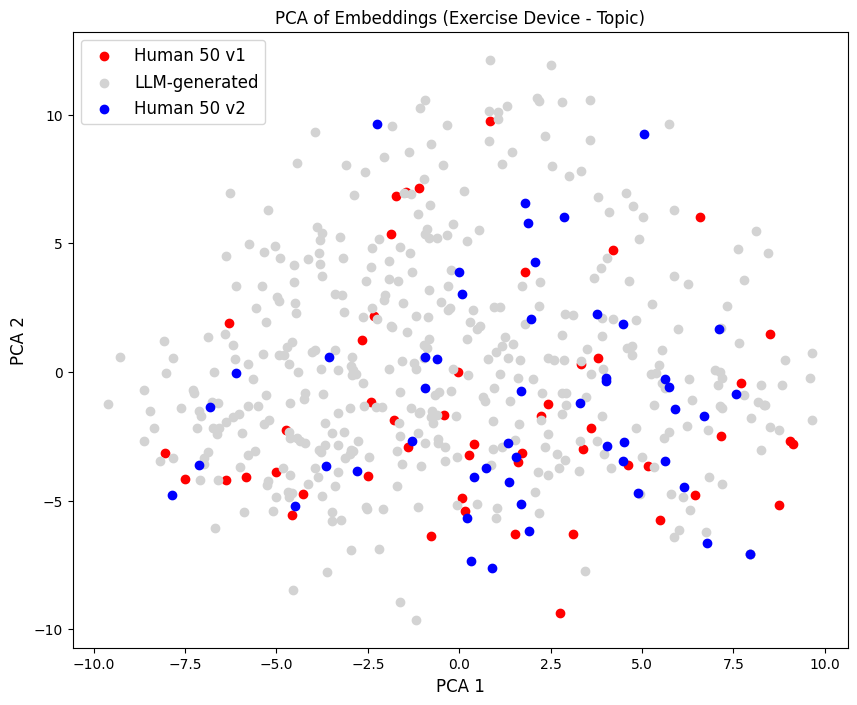

In [46]:
# Create a list of labels for each embedding
labels = []
for column in column_embeddings.keys():
    # Extend the labels list with the column name repeated as many times as there are embeddings for that column
    labels.extend([column] * len(column_embeddings[column]))
    
# Modify labels to group all non-specific columns under 'LLM-generated'
modified_labels = ['Human 50 v1' if label == 'human-1' else 'Human 50 v2' if label == 'human-2' else 'LLM-generated' for label in labels]

plt.figure(figsize=(10, 8))

# Define colors for specific labels and a default color
colors = {'Human 50 v1': 'red', 'Human 50 v2': 'blue', 'LLM-generated': 'lightgrey'}

# Scatter plot for the reduced embeddings with custom colors and labels
for label in set(modified_labels):
    # Get indices for embeddings with the current label
    indices = [i for i, x in enumerate(modified_labels) if x == label]
    # Scatter plot for embeddings of the current label with specific color
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], color=colors[label], label=label)

plt.legend(fontsize = 12)
plt.title('PCA of Embeddings (Exercise Device - Topic)', fontsize = 12)
plt.xlabel('PCA 1', fontsize = 12)
plt.ylabel('PCA 2', fontsize = 12)
plt.show()

# Powder

In [47]:
csv_files = [
    'data/ablation_topic_powder.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)

In [48]:
all_embeddings = []

for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

all_embeddings_array = np.array(all_embeddings)

In [49]:
# Perform PCA to reduce the embeddings to 2 dimensions for visualization
pca = PCA(n_components=2)
all_embeddings_array = StandardScaler().fit_transform(all_embeddings_array)
reduced_embeddings = pca.fit_transform(all_embeddings_array)

# Compute information loss
information_loss = 1 - np.sum(pca.explained_variance_ratio_)
print(f"Information Loss: {information_loss * 100:.2f}%")

# Steps to calculate reconstruction error

# Project the reduced data back to the original space
reconstructed_embeddings = pca.inverse_transform(reduced_embeddings)

# Calculate reconstruction error
reconstruction_error = mean_squared_error(all_embeddings_array, reconstructed_embeddings)

print(f"Reconstruction Error: {reconstruction_error}")

Information Loss: 90.54%
Reconstruction Error: 0.9053740501403809


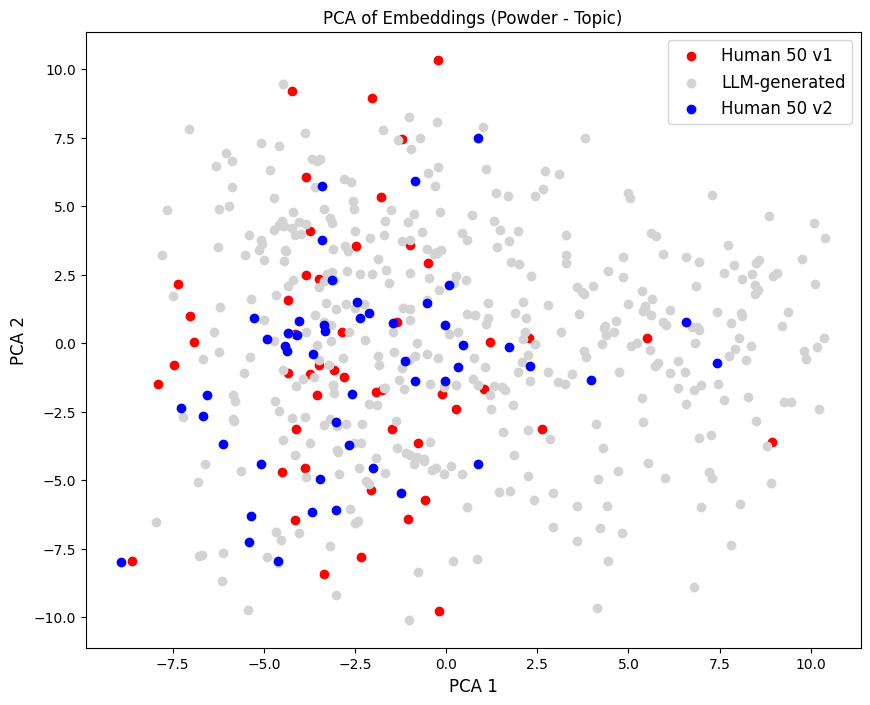

In [50]:
# Create a list of labels for each embedding
labels = []
for column in column_embeddings.keys():
    # Extend the labels list with the column name repeated as many times as there are embeddings for that column
    labels.extend([column] * len(column_embeddings[column]))
    
# Modify labels to group all non-specific columns under 'LLM-generated'
modified_labels = ['Human 50 v1' if label == 'human-1' else 'Human 50 v2' if label == 'human-2' else 'LLM-generated' for label in labels]

plt.figure(figsize=(10, 8))

# Define colors for specific labels and a default color
colors = {'Human 50 v1': 'red', 'Human 50 v2': 'blue', 'LLM-generated': 'lightgrey'}

# Scatter plot for the reduced embeddings with custom colors and labels
for label in set(modified_labels):
    # Get indices for embeddings with the current label
    indices = [i for i, x in enumerate(modified_labels) if x == label]
    # Scatter plot for embeddings of the current label with specific color
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], color=colors[label], label=label)

plt.legend(fontsize = 12)
plt.title('PCA of Embeddings (Powder - Topic)', fontsize = 12)
plt.xlabel('PCA 1', fontsize = 12)
plt.ylabel('PCA 2', fontsize = 12)
plt.show()

# Time

In [51]:
csv_files = [
    'data/ablation_topic_time.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)

In [52]:
all_embeddings = []

for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

all_embeddings_array = np.array(all_embeddings)

In [53]:
# Perform PCA to reduce the embeddings to 2 dimensions for visualization
pca = PCA(n_components=2)
all_embeddings_array = StandardScaler().fit_transform(all_embeddings_array)
reduced_embeddings = pca.fit_transform(all_embeddings_array)

# Compute information loss
information_loss = 1 - np.sum(pca.explained_variance_ratio_)
print(f"Information Loss: {information_loss * 100:.2f}%")

# Steps to calculate reconstruction error

# Project the reduced data back to the original space
reconstructed_embeddings = pca.inverse_transform(reduced_embeddings)

# Calculate reconstruction error by comparing the original embeddings with reconstructed embeddings
reconstruction_error = mean_squared_error(all_embeddings_array, reconstructed_embeddings)

print(f"Reconstruction Error: {reconstruction_error}")

Information Loss: 89.78%
Reconstruction Error: 0.8978301882743835


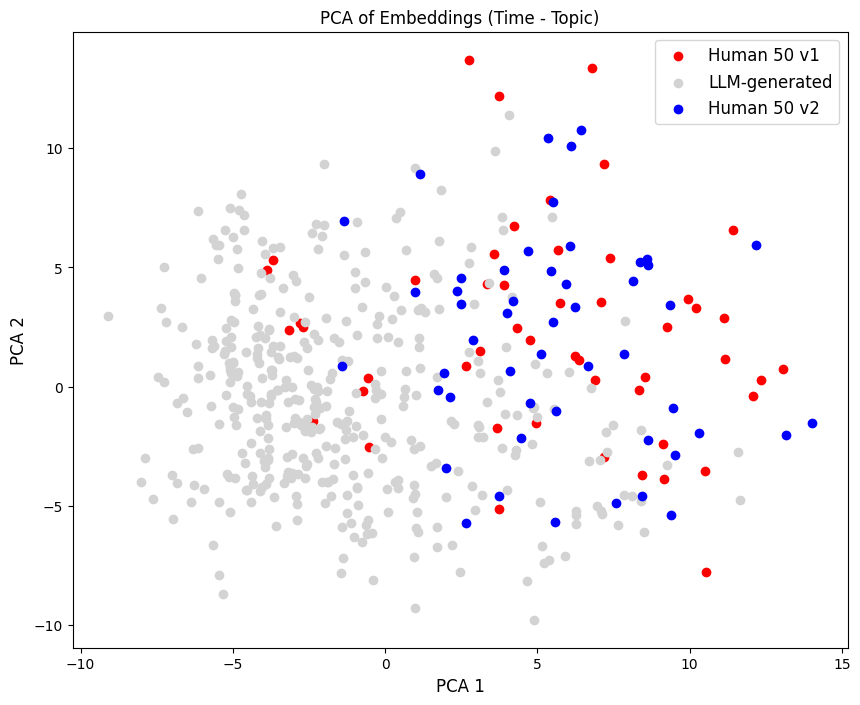

In [54]:
# Create a list of labels for each embedding
labels = []
for column in column_embeddings.keys():
    # Extend the labels list with the column name repeated as many times as there are embeddings for that column
    labels.extend([column] * len(column_embeddings[column]))

# Modify labels to group all non-specific columns under 'LLM-generated'
modified_labels = ['Human 50 v1' if label == 'human-1' else 'Human 50 v2' if label == 'human-2' else 'LLM-generated' for label in labels]

plt.figure(figsize=(10, 8))

# Define colors for specific labels and a default color
colors = {'Human 50 v1': 'red', 'Human 50 v2': 'blue', 'LLM-generated': 'lightgrey'}

# Scatter plot for the reduced embeddings with custom colors and labels
for label in set(modified_labels):
    # Get indices for embeddings with the current label
    indices = [i for i, x in enumerate(modified_labels) if x == label]
    # Scatter plot for embeddings of the current label with specific color
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], color=colors[label], label=label)

plt.legend(fontsize = 12)
plt.title('PCA of Embeddings (Time - Topic)', fontsize = 12)
plt.xlabel('PCA 1', fontsize = 12)
plt.ylabel('PCA 2', fontsize = 12)
plt.show()

# Towels

In [55]:
csv_files = [
    'data/ablation_topic_towels.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)

In [56]:
all_embeddings = []

for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

all_embeddings_array = np.array(all_embeddings)

In [57]:
# Perform PCA to reduce the embeddings to 2 dimensions for visualization
pca = PCA(n_components=2)
all_embeddings_array = StandardScaler().fit_transform(all_embeddings_array)
reduced_embeddings = pca.fit_transform(all_embeddings_array)

# Compute information loss
information_loss = 1 - np.sum(pca.explained_variance_ratio_)
print(f"Information Loss: {information_loss * 100:.2f}%")

# Steps to calculate reconstruction error

# Project the reduced data back to the original space
reconstructed_embeddings = pca.inverse_transform(reduced_embeddings)

# Calculate reconstruction error by comparing the original embeddings with reconstructed embeddings
reconstruction_error = mean_squared_error(all_embeddings_array, reconstructed_embeddings)

print(f"Reconstruction Error: {reconstruction_error}")

Information Loss: 86.78%
Reconstruction Error: 0.8677752017974854


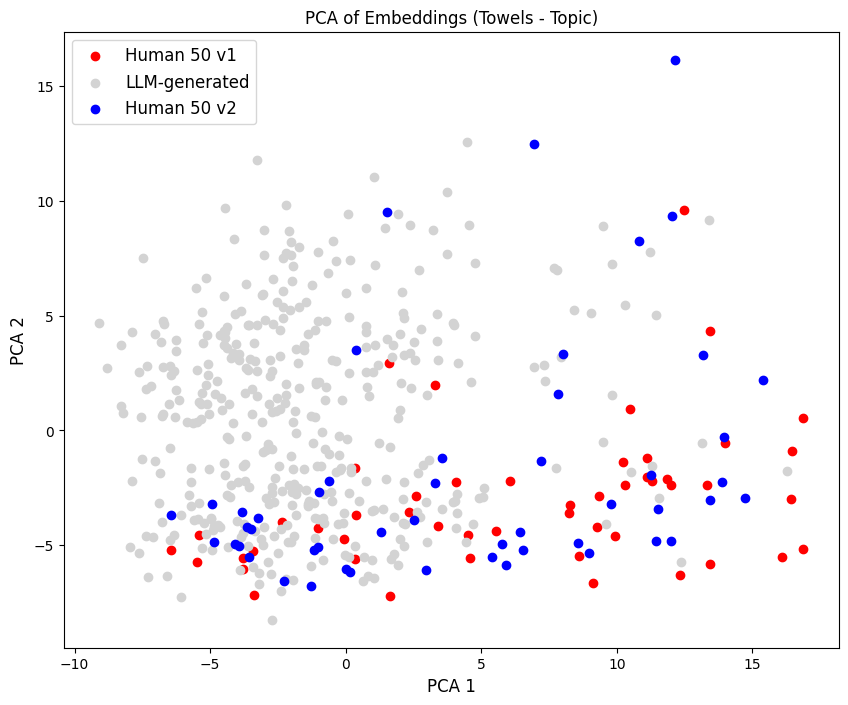

In [58]:
# Create a list of labels for each embedding
labels = []
for column in column_embeddings.keys():
    # Extend the labels list with the column name repeated as many times as there are embeddings for that column
    labels.extend([column] * len(column_embeddings[column]))

# Modify labels to group all non-specific columns under 'LLM-generated'
modified_labels = ['Human 50 v1' if label == 'human-1' else 'Human 50 v2' if label == 'human-2' else 'LLM-generated' for label in labels]

plt.figure(figsize=(10, 8))

# Define colors for specific labels and a default color
colors = {'Human 50 v1': 'red', 'Human 50 v2': 'blue', 'LLM-generated': 'lightgrey'}

# Scatter plot for the reduced embeddings with custom colors and labels
for label in set(modified_labels):
    # Get indices for embeddings with the current label
    indices = [i for i, x in enumerate(modified_labels) if x == label]
    # Scatter plot for embeddings of the current label with specific color
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], color=colors[label], label=label)

plt.legend(fontsize = 12)
plt.title('PCA of Embeddings (Towels - Topic)', fontsize = 12)
plt.xlabel('PCA 1', fontsize = 12)
plt.ylabel('PCA 2', fontsize = 12)
plt.show()